<a href="https://colab.research.google.com/github/VarunTej9/iris-perceptron/blob/main/Iris_Flower_Classification_using_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00


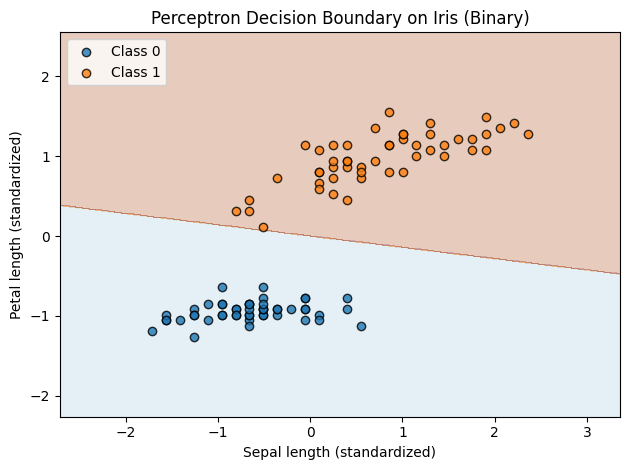

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

X = X[y != 2]
y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# Predict and evaluate
y_pred = ppn.predict(X_test_std)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Visualization
def plot_decision_regions(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                           np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    label=f'Class {cl}',
                    edgecolor='black')

    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Petal length (standardized)')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_decision_regions(np.vstack((X_train_std, X_test_std)),
                      np.hstack((y_train, y_test)),
                      classifier=ppn,
                      title="Perceptron Decision Boundary on Iris (Binary)")
